<a href="https://colab.research.google.com/github/godpeny/laboratory/blob/master/Study/Deep_Learning_for_Everyone/Chapter_5/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install
%pip install pandas
%pip install numpy
%pip install tensorflow
%pip install sklearn
%pip install matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
# import
import pandas as pd
import numpy as np

from google.colab import drive

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, LeakyReLU, BatchNormalization, Reshape, Activation, UpSampling2D, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [3]:
"""
load mnist datasets
"""
(X_train, _), (X_test, _) = mnist.load_data() # X_train.shape = (60000, 28, 28), X_test.shape = (10000, 28, 28)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32') / 255

11490434/11490434 [==============================] - 2s 0us/step


#Autoencoder
https://www.jeremyjordan.me/autoencoders/

design a neural network architecture such that we impose a bottleneck in the network which forces a compressed knowledge representation of the original input.

In [4]:
autoencoder = Sequential()

"""
encoding phase of modeling

compress dimension to get details of input.
"""
autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)))
autoencoder.add(MaxPooling2D(padding='same')) # default pool size = (2,2)
autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu'))
autoencoder.add(MaxPooling2D(padding='same')) # default pool size = (2,2)
autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu'))


"""
decoding phase of modeling

back to input_shape
"""
autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(filters=1, kernel_size=(3,3), padding='same', activation='sigmoid'))

autoencoder.summary()

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           5

In [5]:
"""
training
"""
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

Epoch 1/50
469/469 [==============================] - 16s 7ms/step - loss: 0.2096 - val_loss: 0.1361
Epoch 2/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1261 - val_loss: 0.1171
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1137 - val_loss: 0.1090
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1077 - val_loss: 0.1042
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1037 - val_loss: 0.1011
Epoch 6/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1008 - val_loss: 0.0984
Epoch 7/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0986 - val_loss: 0.0967
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0969 - val_loss: 0.0949
Epoch 9/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0955 - val_loss: 0.0937
Epoch 10/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0942 - val_loss: 0.092

313/313 [==============================] - 1s 2ms/step


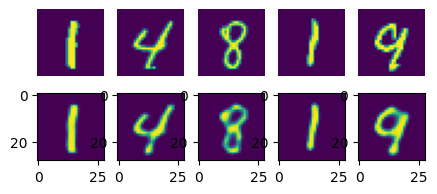

In [14]:
"""
evaluate

compare real with gen images
"""

random_test = np.random.randint(X_test.shape[0], size=5) # pick random image indices from test
ae_imgs = autoencoder.predict(X_test) # autoencoder images

plt.figure(figsize=(5,2)) # size of total figure

for i, img_idx in enumerate(random_test):
  ax = plt.subplot(2,5,i+1)
  plt.imshow(X_test[img_idx].reshape(28,28))
  ax.axis('off')

  ax = plt.subplot(2, 5, 5+i+1)
  plt.imshow(ae_imgs[img_idx].reshape(28,28))

plt.show()

#plt.subplot
When you call plt.subplot(2, 5, 1), it means:

You are dividing the figure into a grid with 2 rows and 5 columns, so you'll have 10 subplots in total.

The 1 at the end means you are selecting the first subplot as the current subplot, where the subsequent plot commands will draw to.